<b><h1 style="color:blue;">CONTEXT</h1><b><br/>

How do you identify a loan defaulter?<br/><br/>
    This case study addresses a very common problem in the Banking industry as Financial institutions incur significant losses due to the default of vehicle loans.<h1 style="color:red;">"To approve or reject this loan application?"</h1>. The bank executives rely on extensive background checks to take the decision.<br/><br/> 
    In this case study it is our task to design a better credit risk scoring model so as to ensure that clients capable of repayment are not rejected and important determinants can be identified which can be further used for minimising the default rates.<br/><br/>
    We will follow step by step approach from data importing to plotting the model and explore the basics of data science!

<b><big><big>Reading the data</big><big></b><br/>
The data has one file "train.csv". This file contains 233154 vehicle loanee data.

## Data description
The business meaning of each column in the data is as below

* <b>UniqueID</b>: Identifier for customers.
* <b>disbursed_amount</b>: Amount of Loan disbursed.
* <b>asset_cost</b>:Cost of the Asset.
* <b>ltv</b>: Loan to Value of the asset, the ratio of a loan to the value of an asset purchased.
* <b>branch_id</b>: Branch where the loan was disbursed
* <b>supplier_id</b>:Vehicle Dealer where the loan was disbursed.
* <b>manufacturer_id</b>: Vehicle manufacturer(Hero, Honda, TVS etc.).
* <b>Current_pincode_ID</b>: Current pincode of the customer.
* <b>Date.of.Birth</b>: Date of birth of the customer.
* <b>Age in Yrs</b>: age of customer.
* <b>Employment.Type</b>: Employment Type of the customer (Salaried/Self Employed).
* <b>DisbursalDate</b>: Date of disbursement.
* <b>Loan Tenure in Yrs</b>: Date of disbursement in yrs 
* <b>State_ID</b>: State of disbursement.
* <b>Employee_code_ID</b>: Employee of the organization who logged the disbursement.
* <b>MobileNo_Avl_Flag</b>: if Mobile no. was shared by the customer then flagged as 1.
* <b>Aadhar_flag</b>: if aadhar was shared by the customer then flagged as 1.
* <b>PAN_flag</b>: if pan was shared by the customer then flagged as 1.
* <b>VoterID_flag</b>: if voter  was shared by the customer then flagged as 1.
* <b>Driving_flag</b>: if DL was shared by the customer then flagged as 1  
* <b>Passport_flag</b>:if passport was shared by the customer then flagged as 1 
* <b>PERFORM_CNS.SCORE</b>: Bureau Score 
* <b>PERFORM_CNS.SCORE.DESCRIPTION</b>: Bureau score description
* <b>PRI.NO.OF.ACCTS</b>: count of total loans taken by the customer at the time of disbursement
* <b>PRI.ACTIVE.ACCTS</b>:count of active loans taken by the customer at the time of disbursement
* <b>PRI.OVERDUE.ACCTS</b>: count of default accounts at the time of disbursement,not kept up to date with the agreed payments.
* <b>PRI.CURRENT.BALANCE</b>:total Principal outstanding amount of the active loans at the time of disbursement
* <b>PRI.SANCTIONED.AMOUNT</b>: total amount that was sanctioned for all the loans at the time of disbursement 
* <b>PRI.DISBURSED.AMOUNT</b>: total amount that was disbursed for all the loans at the time of disbursemen
* <b>SEC.NO.OF.ACCTS</b>: count of total loans taken by the customer at the time of disbursement
* <b>SEC.ACTIVE.ACCTS</b>: count of active loans taken by the customer at the time of disbursement
* <b>SEC.OVERDUE.ACCTS</b>:count of default accounts at the time of disbursement
* <b>SEC.CURRENT.BALANCE</b>:total Principal outstanding amount of the active loans at the time of disbursement
* <b>SEC.SANCTIONED.AMOUNT</b>:total amount that was sanctioned for all the loans at the time of disbursement
* <b>SEC.DISBURSED.AMOUNT</b>:total amount that was disbursed for all the loans at the time of disbursement
* <b>PRIMARY.INSTAL.AMT</b>:EMI Amount of the primary loan
* <b>SEC.INSTAL.AMT</b>: EMI Amount of the secondary loan
* <b>NEW.ACCTS.IN.LAST.SIX.MONTHSS</b>:New loans taken by the customer in last 6 months before the disbursment
* <b>DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS</b>: Loans defaulted in the last 6 months
* <b>AVERAGE.ACCT.AGE</b>:Average loan tenure
* <b>AVERAGE.ACCT.AGE in YRS</b>: Average loan tenure in yrs
* <b>CREDIT.HISTORY.LENGTH</b>: Time since first loan
* <b>CREDIT.HISTORY.LENGTH In YRS</b>: Time since first loan in yrs
* <b>NO.OF_INQUIRIES</b>: Enquries done by the customer for loans
* <b>loan_default</b>:Payment default in the first EMI on due date <b> Target Variable! </b> 


In [8]:
import numpy as np
import pandas as pd
import MyLibrary
from MyLibrary import newfunction

In [9]:
import warnings
warnings.filterwarnings('ignore')

In [10]:
# Use pandas to read a csv file by prodiving the path of file to read_csv() function
# Many other formats are available e.g read_excel(), read_table(), read_json etc. 
# these options can be seen using dot tab option
# The output of read_csv function here is stored as a DataFrame
loandata=pd.read_csv(filepath_or_buffer="D:\\Data Scienece\\IVY PRO\\Python\\Python Datasets\\Python Datasets\\external\\l&t\\train.csv"
, 
                              sep=',', encoding='latin-1')

# Controlling data display options
pd.options.display.max_columns=45
pd.set_option('max_rows',2000)
print('Shape before deleting duplicate values:', loandata.shape)

# Removing duplicate rows if any
loandata=loandata.drop_duplicates()
print('Shape After deleting duplicate values:', loandata.shape)

# Printing few records of the data
loandata.head(n=10)

Shape before deleting duplicate values: (233154, 45)
Shape After deleting duplicate values: (233154, 45)


,UniqueID,disbursed_amount,asset_cost,ltv,branch_id,supplier_id,manufacturer_id,Current_pincode_ID,Date.of.Birth,Age in Yrs,Employment.Type,DisbursalDate,Loan Tenure in Yrs,State_ID,Employee_code_ID,MobileNo_Avl_Flag,Aadhar_flag,PAN_flag,VoterID_flag,Driving_flag,Passport_flag,PERFORM_CNS.SCORE,PERFORM_CNS.SCORE.DESCRIPTION,PRI.NO.OF.ACCTS,PRI.ACTIVE.ACCTS,PRI.OVERDUE.ACCTS,PRI.CURRENT.BALANCE,PRI.SANCTIONED.AMOUNT,PRI.DISBURSED.AMOUNT,SEC.NO.OF.ACCTS,SEC.ACTIVE.ACCTS,SEC.OVERDUE.ACCTS,SEC.CURRENT.BALANCE,SEC.SANCTIONED.AMOUNT,SEC.DISBURSED.AMOUNT,PRIMARY.INSTAL.AMT,SEC.INSTAL.AMT,NEW.ACCTS.IN.LAST.SIX.MONTHS,DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS,AVERAGE.ACCT.AGE,AVERAGE.ACCT.AGE in YRS,CREDIT.HISTORY.LENGTH,CREDIT.HISTORY.LENGTH In YRS,NO.OF_INQUIRIES,loan_default
0,420825,50578,58400,89.55,67,22807,45,1441,01-01-1984,34.9,Salaried,03-08-2018,0.3,6,1998,1,1,0,0,0,0,0,No Bureau History Available,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0yrs 0mon,0.0,0yrs 0mon,0.0,0,0
1,537409,47145,65550,73.23,67,22807,45,1502,31-07-1985,33.3,Self employed,26-09-2018,0.2,6,1998,1,1,0,0,0,0,598,I-Medium Risk,1,1,1,27600,50200,50200,0,0,0,0,0,0,1991,0,0,1,1yrs 11mon,1.9,1yrs 11mon,1.9,0,1
2,417566,53278,61360,89.63,67,22807,45,1497,24-08-1985,33.3,Self employed,01-08-2018,0.3,6,1998,1,1,0,0,0,0,0,No Bureau History Available,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0yrs 0mon,0.0,0yrs 0mon,0.0,0,0
3,624493,57513,66113,88.48,67,22807,45,1501,30-12-1993,24.9,Self employed,26-10-2018,0.1,6,1998,1,1,0,0,0,0,305,L-Very High Risk,3,0,0,0,0,0,0,0,0,0,0,0,31,0,0,0,0yrs 8mon,0.7,1yrs 3mon,1.3,1,1
4,539055,52378,60300,88.39,67,22807,45,1495,09-12-1977,40.9,Self employed,26-09-2018,0.2,6,1998,1,1,0,0,0,0,0,No Bureau History Available,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0yrs 0mon,0.0,0yrs 0mon,0.0,1,1
5,518279,54513,61900,89.66,67,22807,45,1501,08-09-1990,28.2,Self employed,19-09-2018,0.2,6,1998,1,1,0,0,0,0,825,A-Very Low Risk,2,0,0,0,0,0,0,0,0,0,0,0,1347,0,0,0,1yrs 9mon,1.8,2yrs 0mon,2.0,0,0
6,529269,46349,61500,76.42,67,22807,45,1502,01-06-1988,30.5,Salaried,23-09-2018,0.2,6,1998,1,1,0,0,0,0,0,No Bureau History Available,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0yrs 0mon,0.0,0yrs 0mon,0.0,0,0
7,510278,43894,61900,71.89,67,22807,45,1501,04-10-1989,29.1,Salaried,16-09-2018,0.2,6,1998,1,1,0,0,0,0,17,Not Scored: Not Enough Info available on the c...,1,1,0,72879,74500,74500,0,0,0,0,0,0,0,0,0,0,0yrs 2mon,0.2,0yrs 2mon,0.2,0,0
8,490213,53713,61973,89.56,67,22807,45,1497,15-11-1991,27.0,Self employed,05-09-2018,0.2,6,1998,1,1,0,0,0,0,718,D-Very Low Risk,1,1,0,-41,365384,365384,0,0,0,0,0,0,0,0,0,0,4yrs 8mon,4.7,4yrs 8mon,4.7,1,0
9,510980,52603,61300,86.95,67,22807,45,1492,01-06-1968,50.5,Salaried,16-09-2018,0.2,6,1998,1,0,0,1,0,0,818,A-Very Low Risk,1,0,0,0,0,0,0,0,0,0,0,0,2608,0,0,0,1yrs 7mon,1.6,1yrs 7mon,1.6,0,0


<b>DATA CLEANING</b>


In [11]:
loandata.replace('\s+','',regex=True,inplace=True)
loandata.columns = loandata.columns.str.replace('\s+','',regex=True)

# Defining the problem statement: 
#### Create a ML model which can predict the clients incapable of repayment of vehicle loan
* Target Variable: loan_default
* Predictors: disbursed_amount:, ltv, Employment.Type, PERFORM_CNS.SCORE etc.

# Determining the type of Machine Learning
Based on the problem statement you can understand that we need to create a <b>supervised ML Classification model</b>, as the target variable is Categorical.

<AxesSubplot:xlabel='loan_default'>

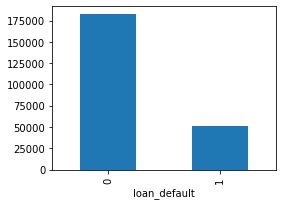

In [12]:
%matplotlib inline
# Creating Bar chart as the Target variable is Categorical
GroupedData=loandata.groupby('loan_default').size() 
GroupedData.plot(kind='bar', figsize=(4,3))

In [13]:
GroupedData=loandata.groupby('loan_default').count()
GroupedData

,UniqueID,disbursed_amount,asset_cost,ltv,branch_id,supplier_id,manufacturer_id,Current_pincode_ID,Date.of.Birth,AgeinYrs,Employment.Type,DisbursalDate,LoanTenureinYrs,State_ID,Employee_code_ID,MobileNo_Avl_Flag,Aadhar_flag,PAN_flag,VoterID_flag,Driving_flag,Passport_flag,PERFORM_CNS.SCORE,PERFORM_CNS.SCORE.DESCRIPTION,PRI.NO.OF.ACCTS,PRI.ACTIVE.ACCTS,PRI.OVERDUE.ACCTS,PRI.CURRENT.BALANCE,PRI.SANCTIONED.AMOUNT,PRI.DISBURSED.AMOUNT,SEC.NO.OF.ACCTS,SEC.ACTIVE.ACCTS,SEC.OVERDUE.ACCTS,SEC.CURRENT.BALANCE,SEC.SANCTIONED.AMOUNT,SEC.DISBURSED.AMOUNT,PRIMARY.INSTAL.AMT,SEC.INSTAL.AMT,NEW.ACCTS.IN.LAST.SIX.MONTHS,DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS,AVERAGE.ACCT.AGE,AVERAGE.ACCT.AGEinYRS,CREDIT.HISTORY.LENGTH,CREDIT.HISTORY.LENGTHInYRS,NO.OF_INQUIRIES
loan_default,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,182543,182543,182543,182543,182543,182543,182543,182543,182543,182543,176526,182543,182543,182543,182543,182543,182543,182543,182543,182543,182543,182543,182543,182543,182543,182543,182543,182543,182543,182543,182543,182543,182543,182543,182543,182543,182543,182543,182543,182543,182543,182543,182543,182543
1,50611,50611,50611,50611,50611,50611,50611,50611,50611,50611,48967,50611,50611,50611,50611,50611,50611,50611,50611,50611,50611,50611,50611,50611,50611,50611,50611,50611,50611,50611,50611,50611,50611,50611,50611,50611,50611,50611,50611,50611,50611,50611,50611,50611


The data distribution of the target variable is not satisfactory to proceed further. We might use over sampling or under sampling or smote to check the accuracy results.

# Basic Data Exploration

In [14]:
loandata.sample( n=10,
    frac=None,
    replace=False,
    weights=None,
    random_state=32,
    axis=0)

,UniqueID,disbursed_amount,asset_cost,ltv,branch_id,supplier_id,manufacturer_id,Current_pincode_ID,Date.of.Birth,AgeinYrs,Employment.Type,DisbursalDate,LoanTenureinYrs,State_ID,Employee_code_ID,MobileNo_Avl_Flag,Aadhar_flag,PAN_flag,VoterID_flag,Driving_flag,Passport_flag,PERFORM_CNS.SCORE,PERFORM_CNS.SCORE.DESCRIPTION,PRI.NO.OF.ACCTS,PRI.ACTIVE.ACCTS,PRI.OVERDUE.ACCTS,PRI.CURRENT.BALANCE,PRI.SANCTIONED.AMOUNT,PRI.DISBURSED.AMOUNT,SEC.NO.OF.ACCTS,SEC.ACTIVE.ACCTS,SEC.OVERDUE.ACCTS,SEC.CURRENT.BALANCE,SEC.SANCTIONED.AMOUNT,SEC.DISBURSED.AMOUNT,PRIMARY.INSTAL.AMT,SEC.INSTAL.AMT,NEW.ACCTS.IN.LAST.SIX.MONTHS,DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS,AVERAGE.ACCT.AGE,AVERAGE.ACCT.AGEinYRS,CREDIT.HISTORY.LENGTH,CREDIT.HISTORY.LENGTHInYRS,NO.OF_INQUIRIES,loan_default
172287,542889,52303,69979,76.45,153,15793,86,364,17-08-1980,38.3,Selfemployed,27-09-2018,0.2,11,2322,1,1,0,0,0,0,602,H-MediumRisk,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1yrs1mon,1.1,1yrs1mon,1.1,1,0
56491,503183,47349,67744,70.85,16,21003,86,2981,10-04-1974,44.6,Selfemployed,13-09-2018,0.2,14,396,1,0,0,1,0,0,0,NoBureauHistoryAvailable,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0yrs0mon,0.0,0yrs0mon,0.0,0,0
114800,567177,60213,81526,74.82,136,18651,48,3766,14-06-1993,25.4,Salaried,10-10-2018,0.1,8,140,1,1,0,0,0,0,762,B-VeryLowRisk,2,2,0,162244,327000,327000,0,0,0,0,0,0,0,0,0,0,1yrs11mon,1.9,2yrs3mon,2.3,0,0
148683,541315,59207,104606,59.27,120,24341,51,6948,01-01-1989,29.9,Selfemployed,27-09-2018,0.2,12,1494,1,1,0,0,0,0,0,NoBureauHistoryAvailable,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0yrs0mon,0.0,0yrs0mon,0.0,0,0
25152,568864,57259,72890,79.57,162,17094,86,1841,27-01-1982,36.8,Salaried,11-10-2018,0.1,4,298,1,1,0,0,0,0,629,H-MediumRisk,13,4,1,256818,256841,256841,0,0,0,0,0,0,24484,0,3,0,1yrs8mon,1.7,9yrs7mon,9.6,2,1
36930,552418,64213,99190,65.53,29,15222,51,5918,07-08-1992,26.3,Selfemployed,30-09-2018,0.2,3,1733,1,1,0,0,0,0,0,NoBureauHistoryAvailable,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0yrs0mon,0.0,0yrs0mon,0.0,0,0
118305,645004,56259,73000,79.45,159,23394,120,7185,07-01-1988,30.8,Selfemployed,30-10-2018,0.1,7,1218,1,1,0,0,0,0,654,F-LowRisk,3,1,0,39459,50000,50000,0,0,0,0,0,0,1206,0,0,1,1yrs4mon,1.3,1yrs5mon,1.4,0,1
82416,492283,47349,72758,65.97,146,17921,86,2948,01-01-1980,38.9,Salaried,06-09-2018,0.2,14,1087,1,1,0,0,0,0,0,NoBureauHistoryAvailable,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0yrs0mon,0.0,0yrs0mon,0.0,0,1
125728,510634,36689,69735,54.49,5,17980,86,3363,11-03-1988,30.7,Salaried,16-09-2018,0.2,9,1243,1,1,0,0,0,0,0,NoBureauHistoryAvailable,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0yrs0mon,0.0,0yrs0mon,0.0,0,0
183723,512592,54966,66510,89.91,79,23972,45,759,01-01-1989,29.9,Selfemployed,17-09-2018,0.2,18,2457,1,1,0,0,0,0,0,NoBureauHistoryAvailable,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0yrs0mon,0.0,0yrs0mon,0.0,0,0


In [15]:
loandata.nunique()

UniqueID                               233154
disbursed_amount                        24565
asset_cost                              46252
ltv                                      6579
branch_id                                  82
supplier_id                              2953
manufacturer_id                            11
Current_pincode_ID                       6698
Date.of.Birth                           15433
AgeinYrs                                  466
Employment.Type                             2
DisbursalDate                              84
LoanTenureinYrs                             3
State_ID                                   22
Employee_code_ID                         3270
MobileNo_Avl_Flag                           1
Aadhar_flag                                 2
PAN_flag                                    2
VoterID_flag                                2
Driving_flag                                2
Passport_flag                               2
PERFORM_CNS.SCORE                 

In [16]:
loandata.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 233154 entries, 0 to 233153
Data columns (total 45 columns):
 #   Column                               Non-Null Count   Dtype  
---  ------                               --------------   -----  
 0   UniqueID                             233154 non-null  int64  
 1   disbursed_amount                     233154 non-null  int64  
 2   asset_cost                           233154 non-null  int64  
 3   ltv                                  233154 non-null  float64
 4   branch_id                            233154 non-null  int64  
 5   supplier_id                          233154 non-null  int64  
 6   manufacturer_id                      233154 non-null  int64  
 7   Current_pincode_ID                   233154 non-null  int64  
 8   Date.of.Birth                        233154 non-null  object 
 9   AgeinYrs                             233154 non-null  float64
 10  Employment.Type                      225493 non-null  object 
 11  DisbursalDate

In [17]:
loandata.describe(include='all')

,UniqueID,disbursed_amount,asset_cost,ltv,branch_id,supplier_id,manufacturer_id,Current_pincode_ID,Date.of.Birth,AgeinYrs,Employment.Type,DisbursalDate,LoanTenureinYrs,State_ID,Employee_code_ID,MobileNo_Avl_Flag,Aadhar_flag,PAN_flag,VoterID_flag,Driving_flag,Passport_flag,PERFORM_CNS.SCORE,PERFORM_CNS.SCORE.DESCRIPTION,PRI.NO.OF.ACCTS,PRI.ACTIVE.ACCTS,PRI.OVERDUE.ACCTS,PRI.CURRENT.BALANCE,PRI.SANCTIONED.AMOUNT,PRI.DISBURSED.AMOUNT,SEC.NO.OF.ACCTS,SEC.ACTIVE.ACCTS,SEC.OVERDUE.ACCTS,SEC.CURRENT.BALANCE,SEC.SANCTIONED.AMOUNT,SEC.DISBURSED.AMOUNT,PRIMARY.INSTAL.AMT,SEC.INSTAL.AMT,NEW.ACCTS.IN.LAST.SIX.MONTHS,DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS,AVERAGE.ACCT.AGE,AVERAGE.ACCT.AGEinYRS,CREDIT.HISTORY.LENGTH,CREDIT.HISTORY.LENGTHInYRS,NO.OF_INQUIRIES,loan_default
count,233154.000000,233154.000000,2.331540e+05,233154.000000,233154.000000,233154.000000,233154.000000,233154.000000,233154,233154.000000,225493,233154,233154.000000,233154.000000,233154.000000,233154.0,233154.00000,233154.000000,233154.000000,233154.000000,233154.000000,233154.000000,233154,233154.000000,233154.000000,233154.000000,2.331540e+05,2.331540e+05,2.331540e+05,233154.000000,233154.000000,233154.000000,2.331540e+05,2.331540e+05,2.331540e+05,2.331540e+05,2.331540e+05,233154.000000,233154.000000,233154,233154.000000,233154,233154.000000,233154.000000,233154.000000
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15433,NaN,2,84,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,192,NaN,294,NaN,NaN,NaN
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,01-01-1988,NaN,Selfemployed,31-10-2018,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NoBureauHistoryAvailable,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0yrs0mon,NaN,0yrs0mon,NaN,NaN,NaN
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2173,NaN,127635,8826,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,116950,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,119373,NaN,119127,NaN,NaN,NaN
mean,535917.573376,54356.993528,7.586507e+04,74.746530,72.936094,19638.635035,69.028054,3396.880247,NaN,34.628159,NaN,NaN,0.186978,7.262243,1549.477148,1.0,0.84032,0.075577,0.144943,0.023242,0.002127,289.462994,NaN,2.440636,1.039896,0.156549,1.659001e+05,2.185039e+05,2.180659e+05,0.059081,0.027703,0.007244,5.427793e+03,7.295923e+03,7.179998e+03,1.310548e+04,3.232684e+02,0.381833,0.097481,NaN,0.747084,NaN,1.358625,0.206615,0.217071
std,68315.693711,12971.314171,1.894478e+04,11.456636,69.834995,3491.949566,22.141304,2238.147502,NaN,9.825605,NaN,NaN,0.083462,4.482230,975.261278,0.0,0.36631,0.264320,0.352044,0.150672,0.046074,338.374779,NaN,5.217233,1.941496,0.548787,9.422736e+05,2.374794e+06,2.377744e+06,0.626795,0.316057,0.111079,1.702370e+05,1.831560e+05,1.825925e+05,1.513679e+05,1.555369e+04,0.955107,0.384439,NaN,1.261378,NaN,2.384236,0.706498,0.412252
min,417428.000000,13320.000000,3.700000e+04,10.030000,1.000000,10524.000000,45.000000,1.000000,NaN,18.100000,NaN,NaN,0.100000,1.000000,1.000000,1.0,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,0.000000,0.000000,0.000000,-6.678296e+06,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,-5.746470e+05,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,NaN,0.000000,NaN,0.000000,0.000000,0.000000
25%,476786.250000,47145.000000,6.571700e+04,68.880000,14.000000,16535.000000,48.000000,1511.000000,NaN,26.500000,NaN,NaN,0.100000,4.000000,713.000000,1.0,1.00000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,NaN,0.000000,NaN,0.000000,0.000000,0.000000
50%,535978.500000,53803.000000,7.094600e+04,76.800000,61.000000,20333.000000,86.000000,2970.000000,NaN,32.900000,NaN,NaN,0.200000,6.000000,1451.000000,1.0,1.00000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.0000

# Basic Data Exploration Results

UniqueID                               233154 qualitative, REJECTED
disbursed_amount                        24565 Continuous,selected
asset_cost                              46252 Continuous,selected
ltv                                      6579 Continuous,selected
branch_id                                  82 qualitative, REJECTED
supplier_id                              2953 qualitative, REJECTED
manufacturer_id                            11 qualitative, REJECTED
Current_pincode_ID                       6698 qualitative, REJECTED
Date.of.Birth                           15433 qualitative, REJECTED
AgeinYrs                                  466 Continuous,selected
Employment.Type                             2 categorical,selected
DisbursalDate                              84 qualitative, REJECTED
LoanTenureinYrs                             3 categorical,selected
State_ID                                   22 categorical,selected
Employee_code_ID                         3270 qualitative, REJECTED
MobileNo_Avl_Flag                           1 qualitative, REJECTED
Aadhar_flag                                 2 categorical,selected
PAN_flag                                    2 categorical,selected
VoterID_flag                                2 categorical,selected
Driving_flag                                2 categorical,selected
Passport_flag                               2 categorical,selected
PERFORM_CNS.SCORE                         573 Continuous,selected
PERFORM_CNS.SCORE.DESCRIPTION              20 categorical,selected
PRI.NO.OF.ACCTS                           108 Continuous,selected
PRI.ACTIVE.ACCTS                           40 Continuous,selected
PRI.OVERDUE.ACCTS                          22 Continuous,selected
PRI.CURRENT.BALANCE                     71341 Continuous,selected
PRI.SANCTIONED.AMOUNT                   44390 Continuous,selected
PRI.DISBURSED.AMOUNT                    47909 Continuous,selected
SEC.NO.OF.ACCTS                            37 Continuous,selected
SEC.ACTIVE.ACCTS                           23 Continuous,selected
SEC.OVERDUE.ACCTS                           9 Continuous,selected
SEC.CURRENT.BALANCE                      3246 Continuous,selected
SEC.SANCTIONED.AMOUNT                    2223 Continuous,selected
SEC.DISBURSED.AMOUNT                     2553 Continuous,selected
PRIMARY.INSTAL.AMT                      28067 Continuous,selected
SEC.INSTAL.AMT                           1918 Continuous,selected
NEW.ACCTS.IN.LAST.SIX.MONTHS               26 Continuous,selected
DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS        14 Continuous,selected
AVERAGE.ACCT.AGE                          192 qualitative, REJECTED
AVERAGE.ACCT.AGEinYRS                     164 Continuous,selected
CREDIT.HISTORY.LENGTH                     294 qualitative, REJECTED
CREDIT.HISTORY.LENGTHInYRS                252 Continuous,selected
NO.OF_INQUIRIES                            25 Continuous,selected
loan_default                                2 categorical,selected

# Removing useless columns from the data

In [18]:
loandata=loandata.drop(columns=['UniqueID','branch_id','supplier_id','manufacturer_id','Current_pincode_ID','Date.of.Birth','Employee_code_ID','DisbursalDate','Employee_code_ID','MobileNo_Avl_Flag','AVERAGE.ACCT.AGE',"CREDIT.HISTORY.LENGTH"])

In [19]:
loandata.sample( n=1000,
    frac=None,
    replace=False,
    weights=None,
    random_state=32,
    axis=0)

,disbursed_amount,asset_cost,ltv,AgeinYrs,Employment.Type,LoanTenureinYrs,State_ID,Aadhar_flag,PAN_flag,VoterID_flag,Driving_flag,Passport_flag,PERFORM_CNS.SCORE,PERFORM_CNS.SCORE.DESCRIPTION,PRI.NO.OF.ACCTS,PRI.ACTIVE.ACCTS,PRI.OVERDUE.ACCTS,PRI.CURRENT.BALANCE,PRI.SANCTIONED.AMOUNT,PRI.DISBURSED.AMOUNT,SEC.NO.OF.ACCTS,SEC.ACTIVE.ACCTS,SEC.OVERDUE.ACCTS,SEC.CURRENT.BALANCE,SEC.SANCTIONED.AMOUNT,SEC.DISBURSED.AMOUNT,PRIMARY.INSTAL.AMT,SEC.INSTAL.AMT,NEW.ACCTS.IN.LAST.SIX.MONTHS,DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS,AVERAGE.ACCT.AGEinYRS,CREDIT.HISTORY.LENGTHInYRS,NO.OF_INQUIRIES,loan_default
172287,52303,69979,76.45,38.3,Selfemployed,0.2,11,1,0,0,0,0,602,H-MediumRisk,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1.1,1.1,1,0
56491,47349,67744,70.85,44.6,Selfemployed,0.2,14,0,0,1,0,0,0,NoBureauHistoryAvailable,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0,0
114800,60213,81526,74.82,25.4,Salaried,0.1,8,1,0,0,0,0,762,B-VeryLowRisk,2,2,0,162244,327000,327000,0,0,0,0,0,0,0,0,0,0,1.9,2.3,0,0
148683,59207,104606,59.27,29.9,Selfemployed,0.2,12,1,0,0,0,0,0,NoBureauHistoryAvailable,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0,0
25152,57259,72890,79.57,36.8,Salaried,0.1,4,1,0,0,0,0,629,H-MediumRisk,13,4,1,256818,256841,256841,0,0,0,0,0,0,24484,0,3,0,1.7,9.6,2,1
36930,64213,99190,65.53,26.3,Selfemployed,0.2,3,1,0,0,0,0,0,NoBureauHistoryAvailable,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0,0
118305,56259,73000,79.45,30.8,Selfemployed,0.1,7,1,0,0,0,0,654,F-LowRisk,3,1,0,39459,50000,50000,0,0,0,0,0,0,1206,0,0,1,1.3,1.4,0,1
82416,47349,72758,65.97,38.9,Salaried,0.2,14,1,0,0,0,0,0,NoBureauHistoryAvailable,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0,1
125728,36689,69735,54.49,30.7,Salaried,0.2,9,1,0,0,0,0,0,NoBureauHistoryAvailable,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0,0
183723,54966,66510,89.91,29.9,Selfemployed,0.2,18,1,0,0,0,0,0,NoBureauHistoryAvailable,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0,0


# treating NAN values

In [20]:
loandata['Employment.Type'].fillna(loandata['Employment.Type'].mode()[0], inplace=True)

# Visual Exploratory Data Analysis
* Categorical variables: Bar plot
* Continuous variables: Histogram

In [21]:
from MyLibrary import newfunction

In [22]:
loandata.columns

Index(['disbursed_amount', 'asset_cost', 'ltv', 'AgeinYrs', 'Employment.Type',
       'LoanTenureinYrs', 'State_ID', 'Aadhar_flag', 'PAN_flag',
       'VoterID_flag', 'Driving_flag', 'Passport_flag', 'PERFORM_CNS.SCORE',
       'PERFORM_CNS.SCORE.DESCRIPTION', 'PRI.NO.OF.ACCTS', 'PRI.ACTIVE.ACCTS',
       'PRI.OVERDUE.ACCTS', 'PRI.CURRENT.BALANCE', 'PRI.SANCTIONED.AMOUNT',
       'PRI.DISBURSED.AMOUNT', 'SEC.NO.OF.ACCTS', 'SEC.ACTIVE.ACCTS',
       'SEC.OVERDUE.ACCTS', 'SEC.CURRENT.BALANCE', 'SEC.SANCTIONED.AMOUNT',
       'SEC.DISBURSED.AMOUNT', 'PRIMARY.INSTAL.AMT', 'SEC.INSTAL.AMT',
       'NEW.ACCTS.IN.LAST.SIX.MONTHS', 'DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS',
       'AVERAGE.ACCT.AGEinYRS', 'CREDIT.HISTORY.LENGTHInYRS',
       'NO.OF_INQUIRIES', 'loan_default'],
      dtype='object')

array([[<AxesSubplot:title={'center':'disbursed_amount'}>,
        <AxesSubplot:title={'center':'asset_cost'}>,
        <AxesSubplot:title={'center':'ltv'}>,
        <AxesSubplot:title={'center':'AgeinYrs'}>,
        <AxesSubplot:title={'center':'PERFORM_CNS.SCORE'}>],
       [<AxesSubplot:title={'center':'PRI.NO.OF.ACCTS'}>,
        <AxesSubplot:title={'center':'PRI.ACTIVE.ACCTS'}>,
        <AxesSubplot:title={'center':'PRI.OVERDUE.ACCTS'}>,
        <AxesSubplot:title={'center':'PRI.CURRENT.BALANCE'}>,
        <AxesSubplot:title={'center':'PRI.SANCTIONED.AMOUNT'}>],
       [<AxesSubplot:title={'center':'PRI.DISBURSED.AMOUNT'}>,
        <AxesSubplot:title={'center':'SEC.NO.OF.ACCTS'}>,
        <AxesSubplot:title={'center':'SEC.ACTIVE.ACCTS'}>,
        <AxesSubplot:title={'center':'SEC.OVERDUE.ACCTS'}>,
        <AxesSubplot:title={'center':'SEC.CURRENT.BALANCE'}>],
       [<AxesSubplot:title={'center':'SEC.SANCTIONED.AMOUNT'}>,
        <AxesSubplot:title={'center':'SEC.DISBURSED.AMOUNT'

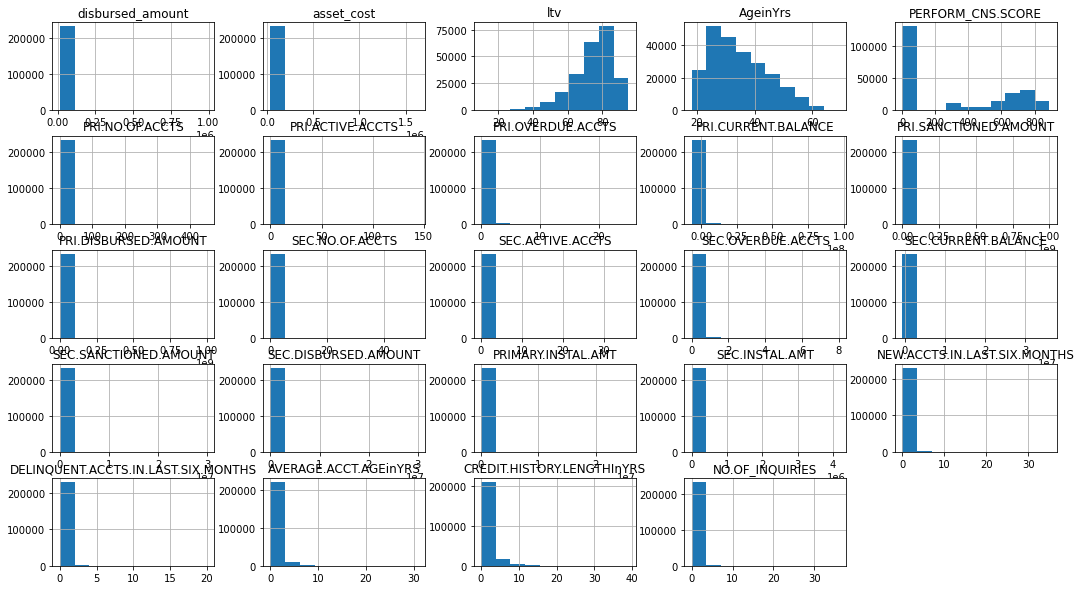

In [23]:
# Calling the function
# Plotting histograms of multiple columns together
loandata.hist(['disbursed_amount', 'asset_cost', 'ltv', 'AgeinYrs', 
       'PERFORM_CNS.SCORE',
        'PRI.NO.OF.ACCTS', 'PRI.ACTIVE.ACCTS',
       'PRI.OVERDUE.ACCTS', 'PRI.CURRENT.BALANCE', 'PRI.SANCTIONED.AMOUNT',
       'PRI.DISBURSED.AMOUNT', 'SEC.NO.OF.ACCTS', 'SEC.ACTIVE.ACCTS',
       'SEC.OVERDUE.ACCTS', 'SEC.CURRENT.BALANCE', 'SEC.SANCTIONED.AMOUNT',
       'SEC.DISBURSED.AMOUNT', 'PRIMARY.INSTAL.AMT', 'SEC.INSTAL.AMT',
       'NEW.ACCTS.IN.LAST.SIX.MONTHS', 'DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS',
       'AVERAGE.ACCT.AGEinYRS', 'CREDIT.HISTORY.LENGTHInYRS',
       'NO.OF_INQUIRIES'], figsize=(18,10))

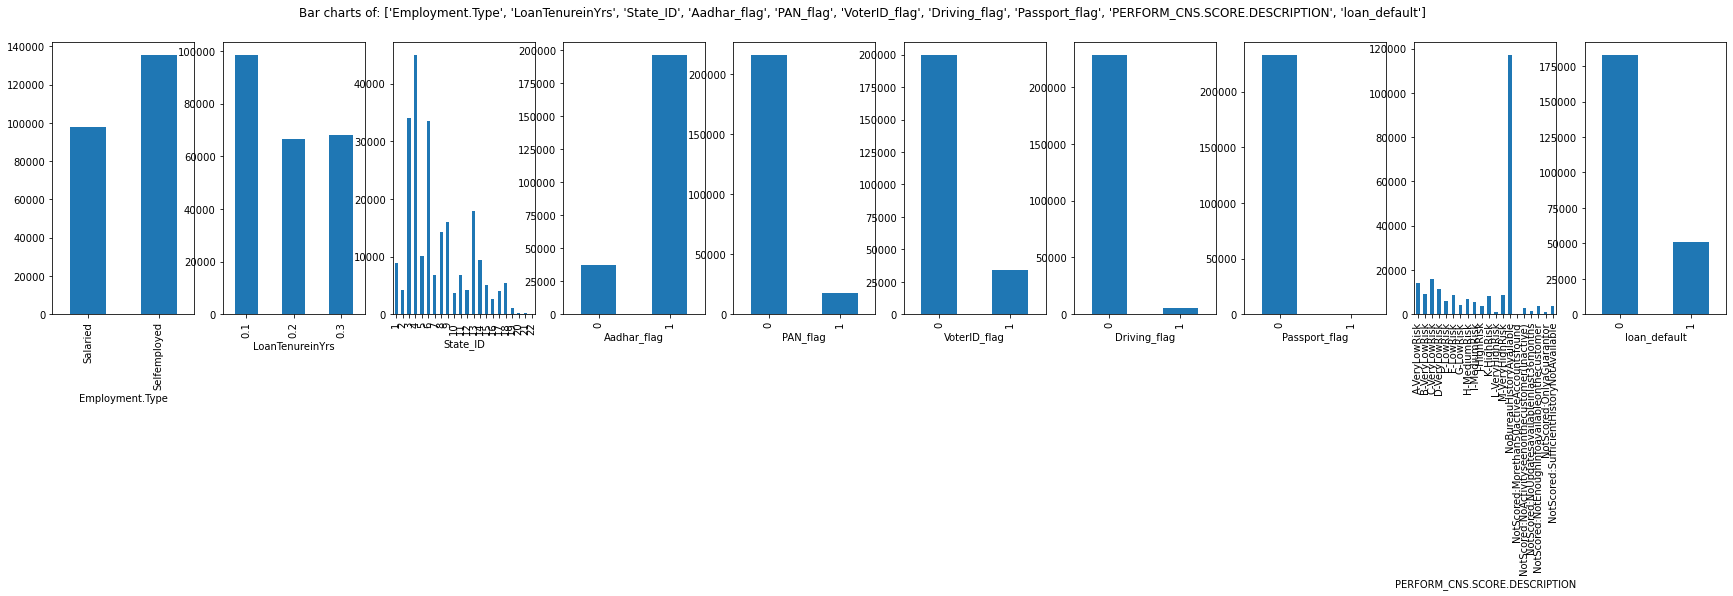

In [24]:
# Calling the function
newfunction.PlotBarCharts(inpData=loandata, colsToPlot=['Employment.Type',
       'LoanTenureinYrs', 'State_ID', 'Aadhar_flag', 'PAN_flag',
       'VoterID_flag', 'Driving_flag', 'Passport_flag', 
       'PERFORM_CNS.SCORE.DESCRIPTION','loan_default'])

# Feature Selection

## Visual exploration of relationship between variables

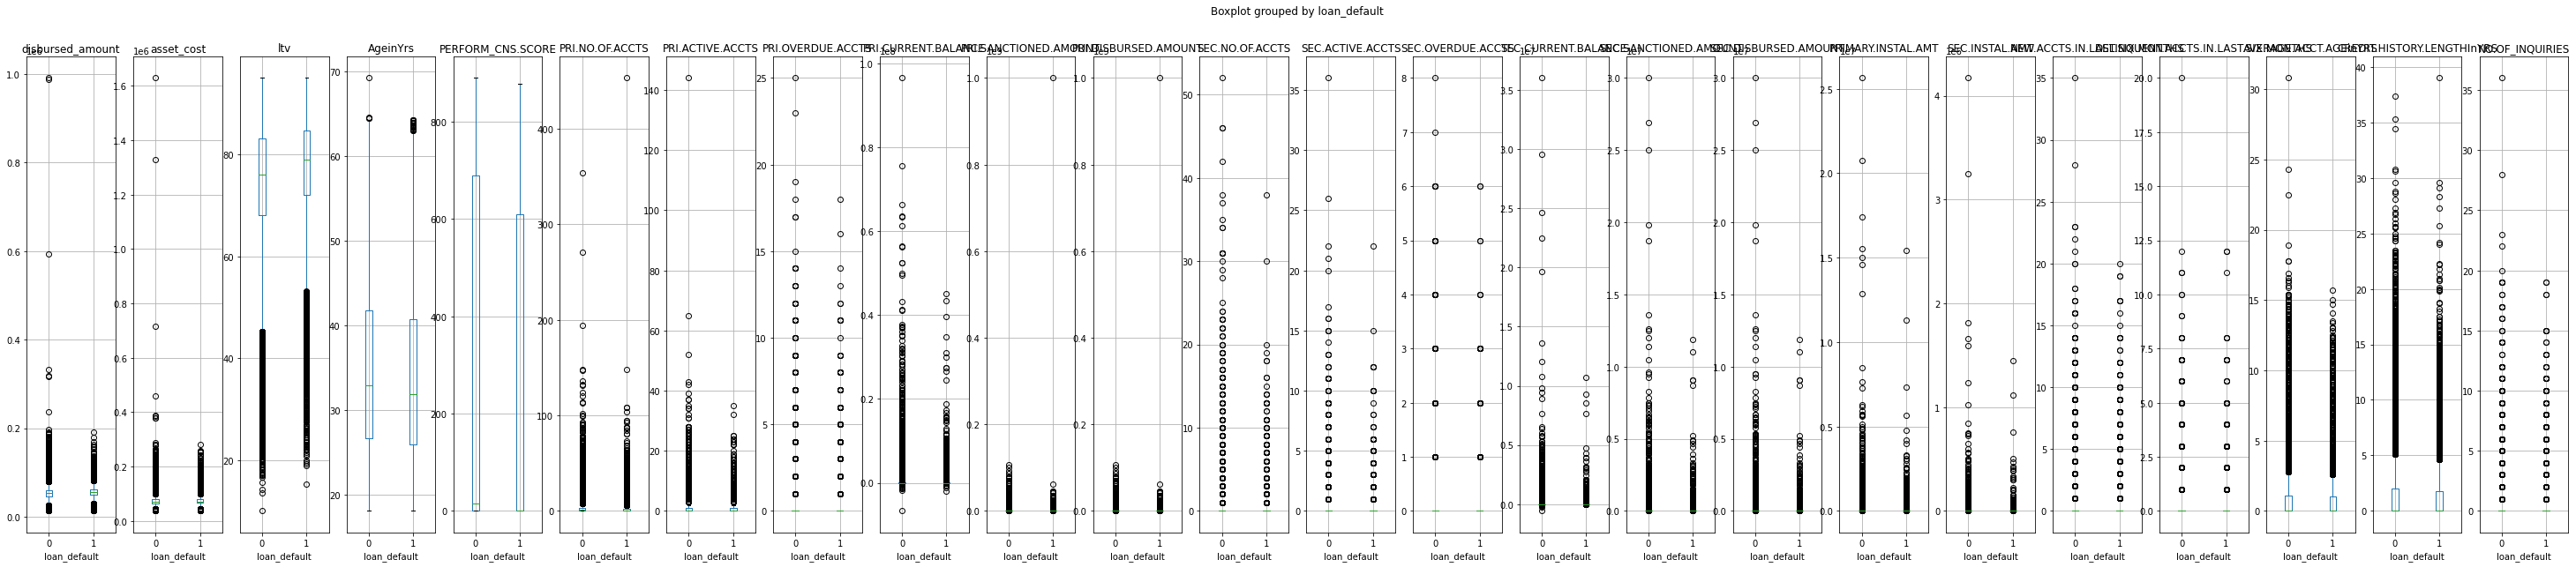

In [25]:
# Calling the function
ContinuousColsList=['disbursed_amount', 'asset_cost', 'ltv', 'AgeinYrs', 
       'PERFORM_CNS.SCORE',
        'PRI.NO.OF.ACCTS', 'PRI.ACTIVE.ACCTS',
       'PRI.OVERDUE.ACCTS', 'PRI.CURRENT.BALANCE', 'PRI.SANCTIONED.AMOUNT',
       'PRI.DISBURSED.AMOUNT', 'SEC.NO.OF.ACCTS', 'SEC.ACTIVE.ACCTS',
       'SEC.OVERDUE.ACCTS', 'SEC.CURRENT.BALANCE', 'SEC.SANCTIONED.AMOUNT',
       'SEC.DISBURSED.AMOUNT', 'PRIMARY.INSTAL.AMT', 'SEC.INSTAL.AMT',
       'NEW.ACCTS.IN.LAST.SIX.MONTHS', 'DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS',
       'AVERAGE.ACCT.AGEinYRS', 'CREDIT.HISTORY.LENGTHInYRS',
       'NO.OF_INQUIRIES']
MyLibrary.newfunction.PlotBoxPlotsTar(inputable=loandata, ContinuousColsList=ContinuousColsList, tvar='loan_default')

In [26]:
ContinuousPredictorList=['disbursed_amount', 'asset_cost', 'ltv', 'AgeinYrs', 
       'PERFORM_CNS.SCORE',
        'PRI.NO.OF.ACCTS', 'PRI.ACTIVE.ACCTS',
       'PRI.OVERDUE.ACCTS', 'PRI.CURRENT.BALANCE', 'PRI.SANCTIONED.AMOUNT',
       'PRI.DISBURSED.AMOUNT', 'SEC.NO.OF.ACCTS', 'SEC.ACTIVE.ACCTS',
       'SEC.OVERDUE.ACCTS', 'SEC.CURRENT.BALANCE', 'SEC.SANCTIONED.AMOUNT',
       'SEC.DISBURSED.AMOUNT', 'PRIMARY.INSTAL.AMT', 'SEC.INSTAL.AMT',
       'NEW.ACCTS.IN.LAST.SIX.MONTHS', 'DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS',
       'AVERAGE.ACCT.AGEinYRS', 'CREDIT.HISTORY.LENGTHInYRS',
       'NO.OF_INQUIRIES']
newfunction.FunctionAnovaCat(inpData=loandata, TargetVariable='loan_default', ContinuousPredictorList=ContinuousPredictorList)

##### ANOVA Results ##### 

disbursed_amount is correlated with loan_default | P-Value: 8.74561717592115e-309
asset_cost is correlated with loan_default | P-Value: 5.716223071606031e-12
ltv is correlated with loan_default | P-Value: 0.0
AgeinYrs is correlated with loan_default | P-Value: 1.3321827769355838e-67
PERFORM_CNS.SCORE is correlated with loan_default | P-Value: 1.8694211192738608e-172
PRI.NO.OF.ACCTS is correlated with loan_default | P-Value: 9.576575137681457e-66
PRI.ACTIVE.ACCTS is correlated with loan_default | P-Value: 3.448627479906049e-89
PRI.OVERDUE.ACCTS is correlated with loan_default | P-Value: 9.13848840849256e-87
PRI.CURRENT.BALANCE is correlated with loan_default | P-Value: 6.221337646393853e-40
PRI.SANCTIONED.AMOUNT is correlated with loan_default | P-Value: 4.7981584215886476e-08
PRI.DISBURSED.AMOUNT is correlated with loan_default | P-Value: 7.17694223790078e-08
SEC.NO.OF.ACCTS is correlated with loan_default | P-Value: 5.149025537677406e-05
SEC.ACTIVE.ACCTS is

['disbursed_amount',
 'asset_cost',
 'ltv',
 'AgeinYrs',
 'PERFORM_CNS.SCORE',
 'PRI.NO.OF.ACCTS',
 'PRI.ACTIVE.ACCTS',
 'PRI.OVERDUE.ACCTS',
 'PRI.CURRENT.BALANCE',
 'PRI.SANCTIONED.AMOUNT',
 'PRI.DISBURSED.AMOUNT',
 'SEC.NO.OF.ACCTS',
 'SEC.ACTIVE.ACCTS',
 'SEC.CURRENT.BALANCE',
 'SEC.SANCTIONED.AMOUNT',
 'SEC.DISBURSED.AMOUNT',
 'PRIMARY.INSTAL.AMT',
 'NEW.ACCTS.IN.LAST.SIX.MONTHS',
 'DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS',
 'AVERAGE.ACCT.AGEinYRS',
 'CREDIT.HISTORY.LENGTHInYRS',
 'NO.OF_INQUIRIES']

In [27]:
CrossTabResult=pd.crosstab(index=loandata['State_ID'], columns=loandata['loan_default'])
CrossTabResult

loan_default,0,1
State_ID,,
1,7353,1583
2,3031,1129
3,27733,6345
4,35544,9326
5,8154,2023
6,26615,6890
7,5417,1369
8,10939,3258
9,12530,3492


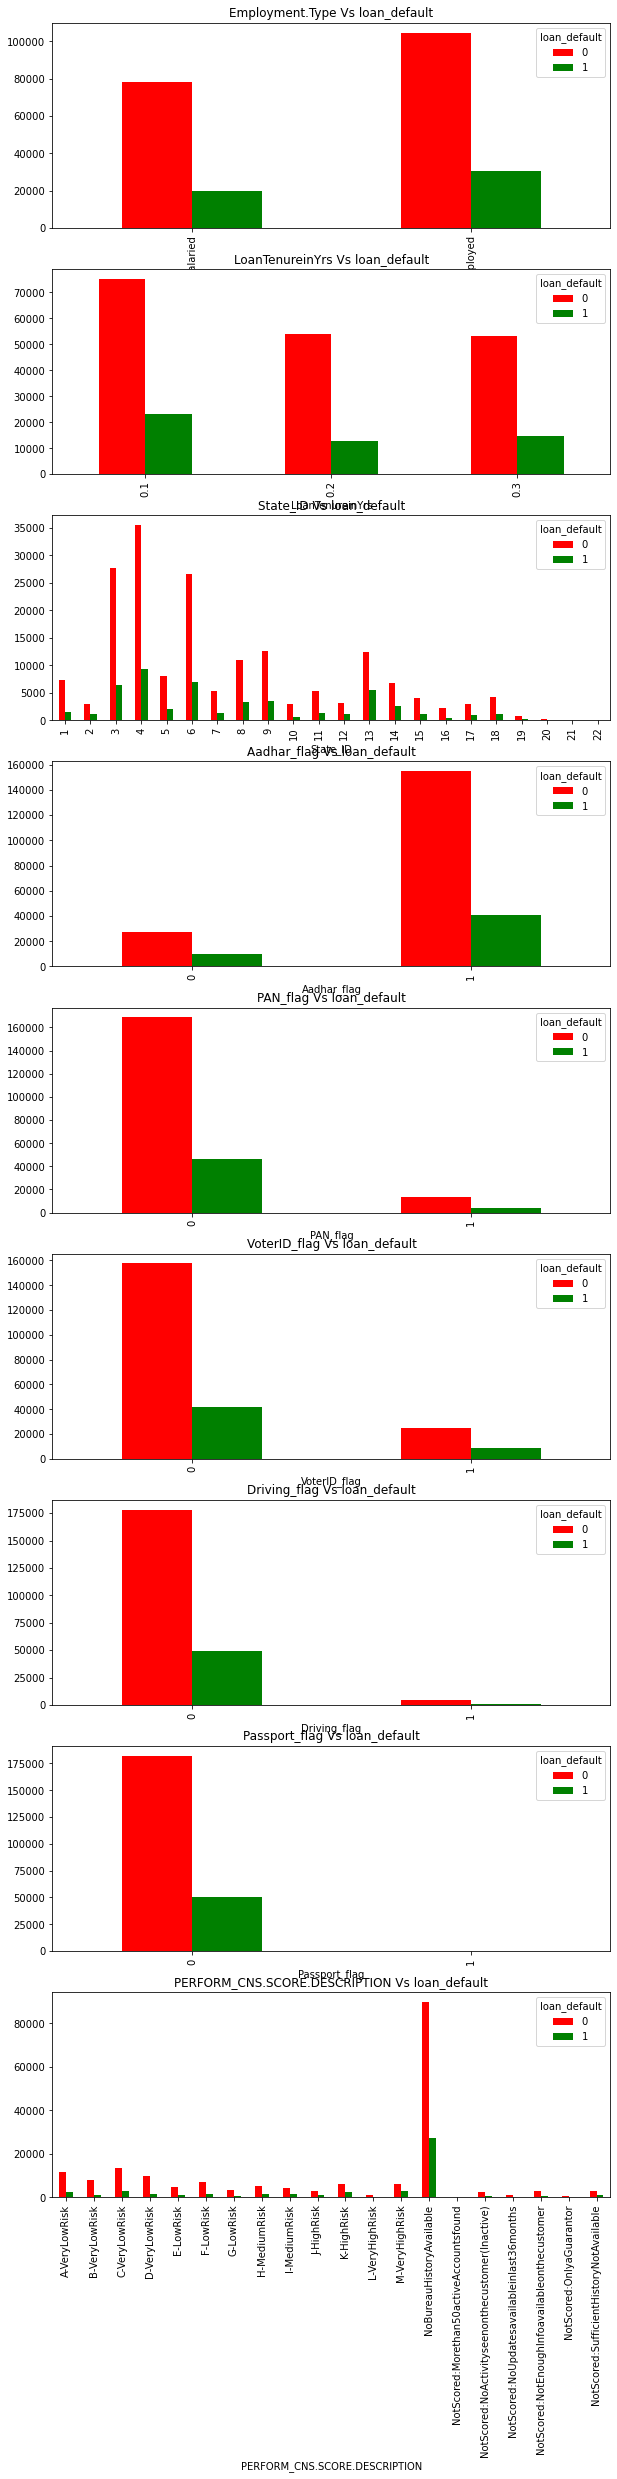

In [28]:
CategoricalColsList=['Employment.Type',
       'LoanTenureinYrs', 'State_ID', 'Aadhar_flag', 'PAN_flag',
       'VoterID_flag', 'Driving_flag', 'Passport_flag', 
       'PERFORM_CNS.SCORE.DESCRIPTION'
       ]

# Calling the function
MyLibrary.newfunction.PlotGroupedBarCharts(indexdf=loandata,
    CategoricalColsList=CategoricalColsList,
    tvar='loan_default')

In [29]:
CategoricalColsList=['Employment.Type','State_ID',
       'LoanTenureinYrs', 
  
       ]

# Calling the function
MyLibrary.newfunction.FunctionChisq( inpData=loandata,
    TargetVariable='loan_default',
    CategoricalVariablesList=CategoricalColsList)

Employment.Type is correlated with loan_default | P-Value: 7.376771988643851e-42
State_ID is correlated with loan_default | P-Value: 0.0
LoanTenureinYrs is correlated with loan_default | P-Value: 3.925173615141421e-96


['Employment.Type', 'State_ID', 'LoanTenureinYrs']

# Selecting final predictors for Machine Learning

In [30]:
SelectedColumns=['disbursed_amount',
 'asset_cost',
 'ltv',
 'PERFORM_CNS.SCORE',
 'PRI.NO.OF.ACCTS',
 'PRI.ACTIVE.ACCTS',
 'PRI.OVERDUE.ACCTS',
 'PRI.CURRENT.BALANCE',
 'PRI.SANCTIONED.AMOUNT',
 'PRI.DISBURSED.AMOUNT',
 'SEC.NO.OF.ACCTS',
 'SEC.ACTIVE.ACCTS',
 'SEC.CURRENT.BALANCE',
 'SEC.SANCTIONED.AMOUNT',
 'SEC.DISBURSED.AMOUNT',
 'PRIMARY.INSTAL.AMT',
 'NEW.ACCTS.IN.LAST.SIX.MONTHS',
 'DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS',
 'AVERAGE.ACCT.AGEinYRS',
 'CREDIT.HISTORY.LENGTHInYRS',
 'NO.OF_INQUIRIES']

# Selecting final columns
DataForML=loandata[SelectedColumns]
DataForML.head()

,disbursed_amount,asset_cost,ltv,PERFORM_CNS.SCORE,PRI.NO.OF.ACCTS,PRI.ACTIVE.ACCTS,PRI.OVERDUE.ACCTS,PRI.CURRENT.BALANCE,PRI.SANCTIONED.AMOUNT,PRI.DISBURSED.AMOUNT,SEC.NO.OF.ACCTS,SEC.ACTIVE.ACCTS,SEC.CURRENT.BALANCE,SEC.SANCTIONED.AMOUNT,SEC.DISBURSED.AMOUNT,PRIMARY.INSTAL.AMT,NEW.ACCTS.IN.LAST.SIX.MONTHS,DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS,AVERAGE.ACCT.AGEinYRS,CREDIT.HISTORY.LENGTHInYRS,NO.OF_INQUIRIES
0,50578,58400,89.55,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0
1,47145,65550,73.23,598,1,1,1,27600,50200,50200,0,0,0,0,0,1991,0,1,1.9,1.9,0
2,53278,61360,89.63,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0
3,57513,66113,88.48,305,3,0,0,0,0,0,0,0,0,0,0,31,0,0,0.7,1.3,1
4,52378,60300,88.39,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,1


## Data Pre-processing for Machine Learning
List of steps performed on predictor variables before data can be used for machine learning
1. Converting each Ordinal Categorical columns to numeric
2. Converting Binary nominal Categorical columns to numeric using 1/0 mapping
3. Converting all other nominal categorical columns to numeric using pd.get_dummies()
4. Data Transformation (Optional): Standardization/Normalization/log/sqrt. Important if you are using distance based algorithms like KNN, or Neural Networks

In [31]:
#DataForML['Employment.Type'].replace({'Salaried':0,'Selfemployed':1}, inplace=True)

In [32]:
# Treating all the nominal variables at once using dummy variables
DataForMLfinalnew=pd.get_dummies(DataForML)

# Adding Target Variable to the data
DataForMLfinalnew['loan_default']=loandata['loan_default']

# Printing sample rows
DataForMLfinalnew.head()

,disbursed_amount,asset_cost,ltv,PERFORM_CNS.SCORE,PRI.NO.OF.ACCTS,PRI.ACTIVE.ACCTS,PRI.OVERDUE.ACCTS,PRI.CURRENT.BALANCE,PRI.SANCTIONED.AMOUNT,PRI.DISBURSED.AMOUNT,SEC.NO.OF.ACCTS,SEC.ACTIVE.ACCTS,SEC.CURRENT.BALANCE,SEC.SANCTIONED.AMOUNT,SEC.DISBURSED.AMOUNT,PRIMARY.INSTAL.AMT,NEW.ACCTS.IN.LAST.SIX.MONTHS,DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS,AVERAGE.ACCT.AGEinYRS,CREDIT.HISTORY.LENGTHInYRS,NO.OF_INQUIRIES,loan_default
0,50578,58400,89.55,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0,0
1,47145,65550,73.23,598,1,1,1,27600,50200,50200,0,0,0,0,0,1991,0,1,1.9,1.9,0,1
2,53278,61360,89.63,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0,0
3,57513,66113,88.48,305,3,0,0,0,0,0,0,0,0,0,0,31,0,0,0.7,1.3,1,1
4,52378,60300,88.39,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,1,1


In [33]:
DataForMLfinalnew.columns

Index(['disbursed_amount', 'asset_cost', 'ltv', 'PERFORM_CNS.SCORE',
       'PRI.NO.OF.ACCTS', 'PRI.ACTIVE.ACCTS', 'PRI.OVERDUE.ACCTS',
       'PRI.CURRENT.BALANCE', 'PRI.SANCTIONED.AMOUNT', 'PRI.DISBURSED.AMOUNT',
       'SEC.NO.OF.ACCTS', 'SEC.ACTIVE.ACCTS', 'SEC.CURRENT.BALANCE',
       'SEC.SANCTIONED.AMOUNT', 'SEC.DISBURSED.AMOUNT', 'PRIMARY.INSTAL.AMT',
       'NEW.ACCTS.IN.LAST.SIX.MONTHS', 'DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS',
       'AVERAGE.ACCT.AGEinYRS', 'CREDIT.HISTORY.LENGTHInYRS',
       'NO.OF_INQUIRIES', 'loan_default'],
      dtype='object')

In [34]:
DataForMLfinalnew.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 233154 entries, 0 to 233153
Data columns (total 22 columns):
 #   Column                               Non-Null Count   Dtype  
---  ------                               --------------   -----  
 0   disbursed_amount                     233154 non-null  int64  
 1   asset_cost                           233154 non-null  int64  
 2   ltv                                  233154 non-null  float64
 3   PERFORM_CNS.SCORE                    233154 non-null  int64  
 4   PRI.NO.OF.ACCTS                      233154 non-null  int64  
 5   PRI.ACTIVE.ACCTS                     233154 non-null  int64  
 6   PRI.OVERDUE.ACCTS                    233154 non-null  int64  
 7   PRI.CURRENT.BALANCE                  233154 non-null  int64  
 8   PRI.SANCTIONED.AMOUNT                233154 non-null  int64  
 9   PRI.DISBURSED.AMOUNT                 233154 non-null  int64  
 10  SEC.NO.OF.ACCTS                      233154 non-null  int64  
 11  SEC.ACTIVE.AC

<b><big>PCA on the dataset<big><b>

In [35]:
# Keeping the target variable for future reference
TargetVariable=DataForMLfinalnew['loan_default']

# Dropping the target variable to get only predictors
# We will apply PCA only on the predictors
OnlyPredictors=DataForMLfinalnew.drop(
       'loan_default', axis=1)


print(OnlyPredictors.shape)
OnlyPredictors.head()

(233154, 21)


,disbursed_amount,asset_cost,ltv,PERFORM_CNS.SCORE,PRI.NO.OF.ACCTS,PRI.ACTIVE.ACCTS,PRI.OVERDUE.ACCTS,PRI.CURRENT.BALANCE,PRI.SANCTIONED.AMOUNT,PRI.DISBURSED.AMOUNT,SEC.NO.OF.ACCTS,SEC.ACTIVE.ACCTS,SEC.CURRENT.BALANCE,SEC.SANCTIONED.AMOUNT,SEC.DISBURSED.AMOUNT,PRIMARY.INSTAL.AMT,NEW.ACCTS.IN.LAST.SIX.MONTHS,DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS,AVERAGE.ACCT.AGEinYRS,CREDIT.HISTORY.LENGTHInYRS,NO.OF_INQUIRIES
0,50578,58400,89.55,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0
1,47145,65550,73.23,598,1,1,1,27600,50200,50200,0,0,0,0,0,1991,0,1,1.9,1.9,0
2,53278,61360,89.63,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0
3,57513,66113,88.48,305,3,0,0,0,0,0,0,0,0,0,0,31,0,0,0.7,1.3,1
4,52378,60300,88.39,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,1


In [36]:
# Extracting the target variable array y and Predictor variables array X
y = TargetVariable.values
X = OnlyPredictors.values


# Printing top 10 sample values
#print(X[0:10])
#print(y[0:10])

### Sandardization of data ###
from sklearn.preprocessing import StandardScaler, MinMaxScaler
PredictorScaler=MinMaxScaler()
PredictorScalerFit=PredictorScaler.fit(X)
X=PredictorScalerFit.transform(X)

print(X[0:2])
print(y[0:2])

[[3.81252737e-02 1.34422786e-02 9.35859715e-01 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 6.47101540e-02
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  1.56975214e-02 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00]
 [3.46123620e-02 1.79335072e-02 7.43791927e-01 6.71910112e-01
  2.20750552e-03 6.94444444e-03 4.00000000e-02 6.49775875e-02
  5.02000000e-05 5.02000000e-05 0.00000000e+00 0.00000000e+00
  1.56975214e-02 0.00000000e+00 0.00000000e+00 7.76436089e-05
  0.00000000e+00 5.00000000e-02 6.16883117e-02 4.87179487e-02
  0.00000000e+00]]
[0 1]


In [37]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
import numpy as np

In [38]:
# Creating maximum components equal to the total number of columns to analyze all of them
pca = PCA(n_components=21)

# fitting the data
pca_fit=pca.fit(X)

# calculating the principal components
reduced_X = pca_fit.transform(X)

#4 Columns present in X are now represented by 49 Principal components present in reduced_X
print(np.round(reduced_X[0:4],2))

[[-0.32 -0.19 -0.01 -0.01 -0.   -0.01 -0.   -0.01 -0.   -0.    0.    0.
  -0.   -0.    0.   -0.    0.   -0.   -0.    0.   -0.  ]
 [ 0.35  0.03  0.01 -0.01  0.05  0.01  0.02 -0.01  0.01 -0.01 -0.01  0.
  -0.    0.    0.    0.    0.    0.    0.   -0.   -0.  ]
 [-0.32 -0.19 -0.01 -0.01 -0.   -0.01 -0.   -0.01 -0.   -0.   -0.    0.
  -0.    0.    0.   -0.    0.   -0.   -0.    0.   -0.  ]
 [ 0.02 -0.16 -0.01 -0.01 -0.01  0.02 -0.02 -0.    0.   -0.    0.    0.
   0.    0.   -0.   -0.    0.   -0.    0.    0.   -0.  ]]


In [39]:
# The Amount of variance explained by each principle componnent
var_explained= pca.explained_variance_ratio_
print(np.round(var_explained,2))

# The first component and second component explain 92% and 5% variance of data respectively

[0.85 0.11 0.02 0.01 0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
 0.   0.   0.   0.   0.   0.   0.  ]


In [40]:
#Cumulative Variance explained by each component
var_explained_cumulative=np.cumsum(np.round(pca.explained_variance_ratio_, decimals=4)*100)
print(var_explained_cumulative)

[85.36 95.92 98.21 98.74 99.02 99.23 99.4  99.56 99.7  99.81 99.86 99.9
 99.94 99.96 99.98 99.99 99.99 99.99 99.99 99.99 99.99]


Text(0, 0.5, '% Variance explained')

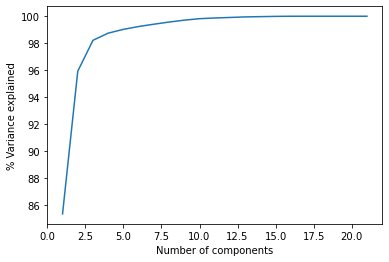

In [41]:
plt.plot( range(1,22), var_explained_cumulative )
plt.xlabel('Number of components')
plt.ylabel('% Variance explained')

In [42]:
# Choosing 3-principal components based on above graph
pca = PCA(n_components=10)

# fitting the data
pca_fit=pca.fit(X)

# calculating the principal components
reduced_X = pca_fit.transform(X)

# Four Columns present in X are now represented by 3-Principal components present in reduced_X
print(np.round(reduced_X[0:10],2))

[[-0.32 -0.19 -0.01 -0.01 -0.   -0.01 -0.   -0.01 -0.   -0.  ]
 [ 0.35  0.03  0.01 -0.01  0.05  0.01  0.02 -0.01  0.01 -0.01]
 [-0.32 -0.19 -0.01 -0.01 -0.   -0.01 -0.   -0.01 -0.   -0.  ]
 [ 0.02 -0.16 -0.01 -0.01 -0.01  0.02 -0.02 -0.    0.   -0.  ]
 [-0.32 -0.17 -0.01 -0.   -0.    0.02 -0.01 -0.01  0.   -0.  ]
 [ 0.61 -0.15 -0.03 -0.04  0.   -0.    0.01 -0.01 -0.    0.  ]
 [-0.33 -0.03 -0.01 -0.   -0.   -0.   -0.   -0.01 -0.   -0.  ]
 [-0.31  0.02 -0.01 -0.   -0.   -0.   -0.   -0.01 -0.   -0.  ]
 [ 0.5  -0.16  0.09 -0.06 -0.02  0.04  0.03 -0.01  0.   -0.  ]
 [ 0.6  -0.12 -0.04 -0.04  0.   -0.    0.01 -0.01 -0.    0.  ]]


In [43]:
Reduceddata=pd.DataFrame(reduced_X, columns=['PC1','PC2','PC3','PC4','PC5','PC6','PC7','PC8','PC9','PC10',
])
Reduceddata['loan_default']=y
Reduceddata.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,loan_default
0,-0.321991,-0.185152,-0.013584,-0.006983,-0.000758,-0.005319,-0.001802,-0.011750,-0.000921,-0.001602,0
1,0.347382,0.030014,0.005913,-0.011053,0.053350,0.011247,0.021927,-0.012253,0.008702,-0.006765,1
2,-0.321960,-0.186146,-0.013586,-0.006968,-0.000771,-0.005180,-0.001461,-0.008502,-0.000669,-0.001435,0
3,0.022427,-0.161020,-0.006729,-0.011066,-0.005191,0.017449,-0.015650,-0.002450,0.001762,-0.002124,1
4,-0.322240,-0.171860,-0.013711,-0.000677,-0.004432,0.018967,-0.013165,-0.009602,0.001699,-0.002028,1


In [44]:
OriginalDatanew=pca_fit.inverse_transform(reduced_X)
print(np.round(OriginalDatanew[0:2],2))

[[ 0.04  0.01  0.94 -0.    0.   -0.   -0.    0.06 -0.   -0.    0.   -0.
   0.02 -0.   -0.   -0.   -0.    0.    0.   -0.   -0.  ]
 [ 0.03  0.02  0.74  0.67  0.01  0.01  0.04  0.07  0.    0.    0.    0.
   0.02  0.    0.    0.   -0.    0.05  0.06  0.05  0.  ]]


In [45]:
print(np.round(X[0:2],2))

[[0.04 0.01 0.94 0.   0.   0.   0.   0.06 0.   0.   0.   0.   0.02 0.
  0.   0.   0.   0.   0.   0.   0.  ]
 [0.03 0.02 0.74 0.67 0.   0.01 0.04 0.06 0.   0.   0.   0.   0.02 0.
  0.   0.   0.   0.05 0.06 0.05 0.  ]]


In [46]:
from imblearn.over_sampling import SMOTE

In [50]:
# Separate Target Variable and Predictor Variables
TargetVariable='loan_default'
Predictors=['PC1','PC2','PC3','PC4','PC5','PC6','PC7','PC8','PC9','PC10',
]


X2=Reduceddata[Predictors].values
y2=Reduceddata[TargetVariable].values

# Split the data into training and testing set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X2, y2, test_size=0.3, random_state=67)

#smote
#from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state = 79)
X_trainres, y_trainres = sm.fit_resample(X_train,y_train)

In [51]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)
print(X_trainres.shape)
print(y_trainres.shape)

(163207, 10)
(163207,)
(69947, 10)
(69947,)
(255488, 10)
(255488,)


In [52]:
# Logistic Regression
from sklearn.linear_model import LogisticRegression
# choose parameter Penalty='l1' or C=1
# choose different values for solver 'newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'
clf = LogisticRegression(C=1,penalty='l2', solver='newton-cg')

# Printing all the parameters of logistic regression
# print(clf)

# Creating the model on Training Data
#LOG=clf.fit(X_train,y_train)
LOG=clf.fit(X_trainres,y_trainres)
prediction=LOG.predict(X_test)


# Measuring accuracy on Testing Data
from sklearn import metrics
print(metrics.classification_report(y_test, prediction))
print(metrics.confusion_matrix(prediction, y_test))

# Printing the Overall Accuracy of the model
F1_Score=metrics.f1_score(y_test, prediction, average='weighted')
print('Accuracy of the model on Testing Sample Data:', round(F1_Score,2))

# Importing cross validation function from sklearn
from sklearn.model_selection import cross_val_score

# Running 10-Fold Cross validation on a given algorithm
# Passing full data X and y because the K-fold will split the data and automatically choose train/test
#Accuracy_Values=cross_val_score(LOG, X2 , y2, cv=10, scoring='f1_weighted')
Accuracy_Values=cross_val_score(LOG, X_trainres, y_trainres, cv=10, scoring='f1_weighted')
print('\nAccuracy values for 10-fold Cross Validation:\n',Accuracy_Values)
print('\nFinal Average Accuracy of the model:', round(Accuracy_Values.mean(),2))

print('\n##### Model Validation  ##########')

# Printing some sample values of prediction
TestingDataResults=pd.DataFrame(data=X_test, columns=Predictors)
TestingDataResults[TargetVariable]=y_test
TestingDataResults[('Predicted'+TargetVariable)]=np.round(prediction)

# Printing sample prediction values
print(TestingDataResults[[TargetVariable,'Predicted'+TargetVariable]].sample(n=20,
    frac=None,
    replace=False,
    weights=None,
    random_state=67,
    axis=0))

              precision    recall  f1-score   support

           0       0.84      0.52      0.64     54799
           1       0.27      0.65      0.38     15148

    accuracy                           0.54     69947
   macro avg       0.55      0.58      0.51     69947
weighted avg       0.72      0.54      0.58     69947

[[28229  5363]
 [26570  9785]]
Accuracy of the model on Testing Sample Data: 0.58

Accuracy values for 10-fold Cross Validation:
 [0.58360756 0.57766054 0.58300241 0.58021892 0.58149718 0.58177099
 0.58520866 0.58544537 0.57813836 0.58436263]

Final Average Accuracy of the model: 0.58

##### Model Validation  ##########
       loan_default  Predictedloan_default
55085             1                      1
45929             0                      0
33969             0                      0
44670             0                      1
66774             0                      1
694               0                      0
63648             1                      1
24540  

              precision    recall  f1-score   support

           0       0.84      0.57      0.68     54799
           1       0.28      0.59      0.38     15148

    accuracy                           0.57     69947
   macro avg       0.56      0.58      0.53     69947
weighted avg       0.71      0.57      0.61     69947

[[31066 23733]
 [ 6136  9012]]
Accuracy of the model on Testing Sample Data: 0.61

Accuracy values for 10-fold Cross Validation:
 [0.58624473 0.5867601  0.59050933 0.59093234 0.59092587 0.59078509
 0.59790162 0.59251508 0.59096263 0.59729544]

Final Average Accuracy of the model: 0.59

##### Model Validation  ##########
       loan_default  Predictedloan_default
55085             1                      1
45929             0                      0
33969             0                      0
44670             0                      1
66774             0                      0
694               0                      0
63648             1                      1
24540  

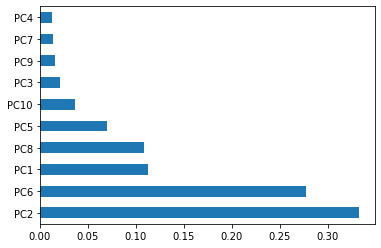

In [107]:
#Decision Trees
from sklearn import tree
#choose from different tunable hyper parameters
clf = tree.DecisionTreeClassifier(max_depth=7,criterion='entropy')

# Printing all the parameters of Decision Trees
#print(clf)

# Creating the model on Training Data
DTree=clf.fit(X_trainres,y_trainres)
prediction=DTree.predict(X_test)

# Measuring accuracy on Testing Data
from sklearn import metrics
print(metrics.classification_report(y_test, prediction))
print(metrics.confusion_matrix(y_test, prediction))

# Printing the Overall Accuracy of the model
F1_Score=metrics.f1_score(y_test, prediction, average='weighted')
print('Accuracy of the model on Testing Sample Data:', round(F1_Score,2))

# Plotting the feature importance for Top 10 most important columns
%matplotlib inline
feature_importances = pd.Series(DTree.feature_importances_, index=Predictors)
feature_importances.nlargest(10).plot(kind='barh')

# Importing cross validation function from sklearn
from sklearn.model_selection import cross_val_score

# Running 10-Fold Cross validation on a given algorithm
# Passing full data X and y because the K-fold will split the data and automatically choose train/test
Accuracy_Values=cross_val_score(DTree, X_trainres , y_trainres, cv=10, scoring='f1_weighted')
print('\nAccuracy values for 10-fold Cross Validation:\n',Accuracy_Values)
print('\nFinal Average Accuracy of the model:', round(Accuracy_Values.mean(),2))

print('\n##### Model Validation  ##########')

# Printing some sample values of prediction
TestingDataResults=pd.DataFrame(data=X_test, columns=Predictors)
TestingDataResults[TargetVariable]=y_test
TestingDataResults[('Predicted'+TargetVariable)]=np.round(prediction)

# Printing sample prediction values
print(TestingDataResults[[TargetVariable,'Predicted'+TargetVariable]].sample(n=20,
    frac=None,
    replace=False,
    weights=None,
    random_state=67,
    axis=0))